### Tathagat Bhattacharyya
# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in the data file
df = pd.read_csv(r'C:\Users\Tathagat\Documents\MIT IDSS\Projects\ExtraaLearn.csv')
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


## Data Overview

- Observations
- Sanity checks

In [3]:
# I can find the number of rows and columns for this data
df.shape

(4612, 15)

In [4]:
# I can see what are the datatypes of the different columns in this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [5]:
# I can also get a statistical summary description of the data
df.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [6]:
# I can check if there are any missing values
df.isna().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

### There are no missing values.

In [7]:
# I can feature engineer all string values in the categorical variables by coding numbers to represent each level
def change_current_occupation(n):
    if n == 'Unemployed':
        return 0
    elif n == 'Professional':
        return 1
    elif n == 'Student':
        return 2
    
def change_first_interaction(x):
    if x == 'Website':
        return 0
    elif x == 'Mobile App':
        return 1

def change_profile_completed(i):
    if i == 'Low':
        return 0
    elif i == 'Medium':
        return 1
    elif i == 'High':
        return 2

def change_last_activity(k):
    if k == 'Website Activity':
        return 0
    elif k == 'Email Activity':
        return 1
    elif k == 'Phone Activity':
        return 2

def change_print_media_type1(z):
    if z == 'No':
        return 0
    elif z == 'Yes':
        return 1

def change_print_media_type2(m):
    if m == 'No':
        return 0
    elif m == 'Yes':
        return 1

def change_digital_media(j):
    if j == 'No':
        return 0
    elif j == 'Yes':
        return 1

def change_educational_channels(c):
    if c == 'No':
        return 0
    elif c == 'Yes':
        return 1

def change_referral(v):
    if v == 'No':
        return 0
    elif v == 'Yes':
        return 1
    
df['current_occupation'] = df['current_occupation'].apply(change_current_occupation)
df['first_interaction'] = df['first_interaction'].apply(change_first_interaction)
df['profile_completed'] = df['profile_completed'].apply(change_profile_completed)
df['last_activity'] = df['last_activity'].apply(change_last_activity)
df['print_media_type1'] = df['print_media_type1'].apply(change_print_media_type1)
df['print_media_type2'] = df['print_media_type2'].apply(change_print_media_type2)
df['digital_media'] = df['digital_media'].apply(change_digital_media)
df['educational_channels'] = df['educational_channels'].apply(change_educational_channels)
df['referral'] = df['referral'].apply(change_referral)
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,0,0,2,7,1639,1.861,0,1,0,1,0,0,1
1,EXT002,56,1,1,1,2,83,0.320,0,0,0,0,1,0,0
2,EXT003,52,1,0,1,3,330,0.074,0,0,0,1,0,0,0
3,EXT004,53,0,0,2,4,464,2.057,0,0,0,0,0,0,1
4,EXT005,23,2,0,2,4,600,16.914,1,0,0,0,0,0,0


In [8]:
# The ID column is unneccessary so I can drop it
del df['ID']
df.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,0,0,2,7,1639,1.861,0,1,0,1,0,0,1
1,56,1,1,1,2,83,0.320,0,0,0,0,1,0,0
2,52,1,0,1,3,330,0.074,0,0,0,1,0,0,0
3,53,0,0,2,4,464,2.057,0,0,0,0,0,0,1
4,23,2,0,2,4,600,16.914,1,0,0,0,0,0,0


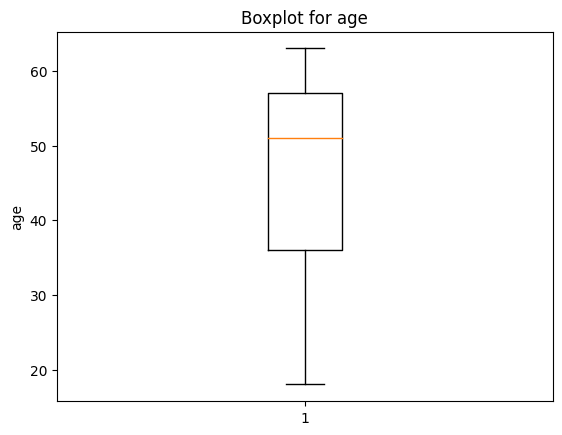

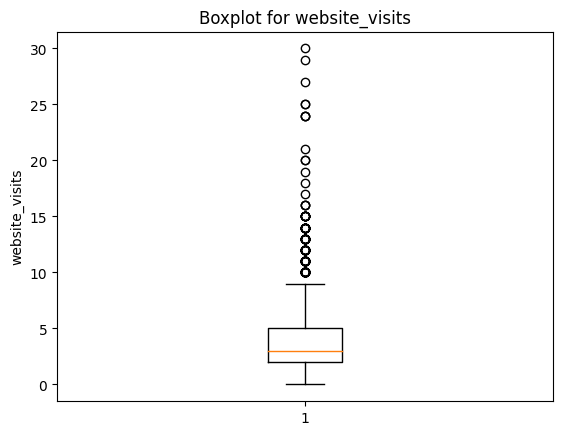

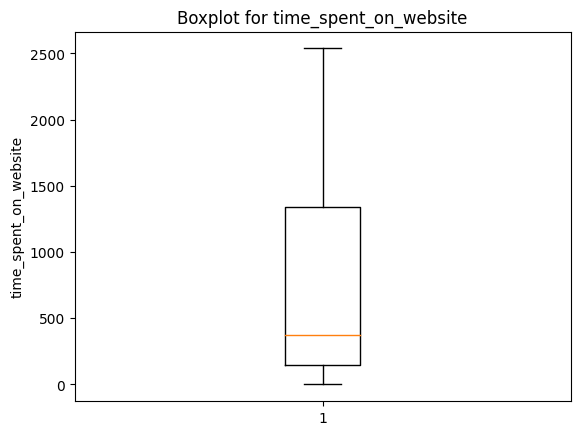

In [9]:
# I can use box plots the numerical variables to check if they have any outliers
plt.boxplot(df['age'])
plt.title('Boxplot for age')
plt.ylabel('age')
plt.show()

plt.boxplot(df['website_visits'])
plt.title('Boxplot for website_visits')
plt.ylabel('website_visits')
plt.show()

plt.boxplot(df['time_spent_on_website'])
plt.title('Boxplot for time_spent_on_website')
plt.ylabel('time_spent_on_website')
plt.show()

### The second boxplot for website_visits has many outliers. Thus, I can remove these outliers from the data.

In [10]:
# I remove the outliers of website_visits
df.drop(index=df[df.website_visits > 9].index, inplace=True)

## EDA

- It is a good idea to explore the data once again after manipulating it.

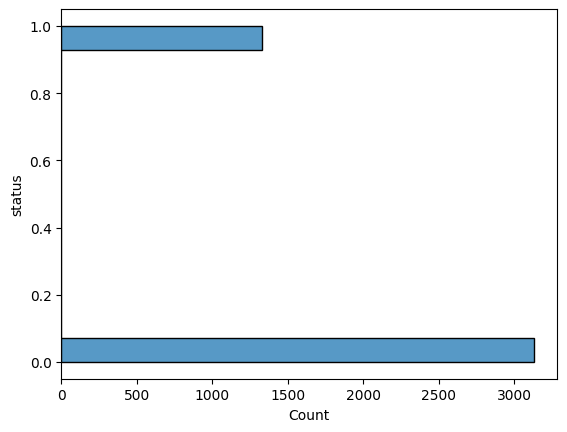

In [11]:
# I can make a plot to compare how many leads are status = 1 and how many are status = 0
sns.histplot(data=df, y='status')
plt.show()

### There are more leads with status = 0 than status = 1

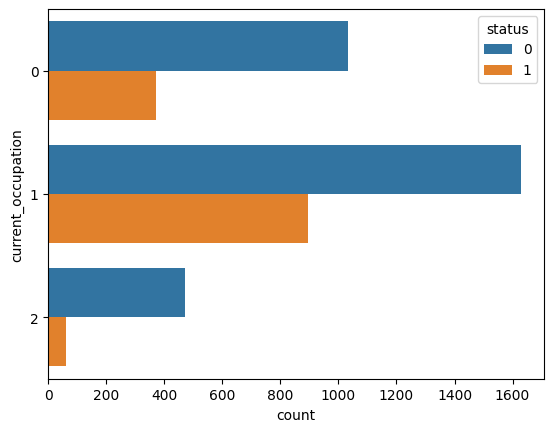

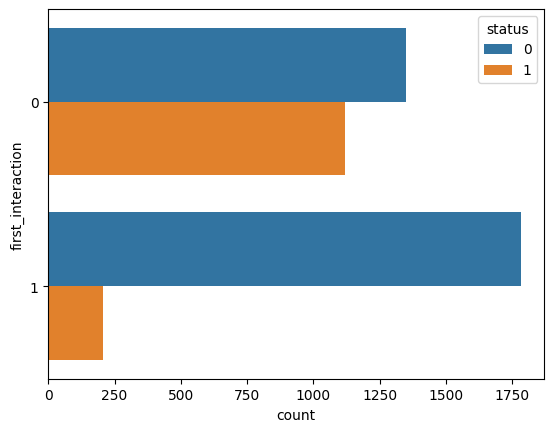

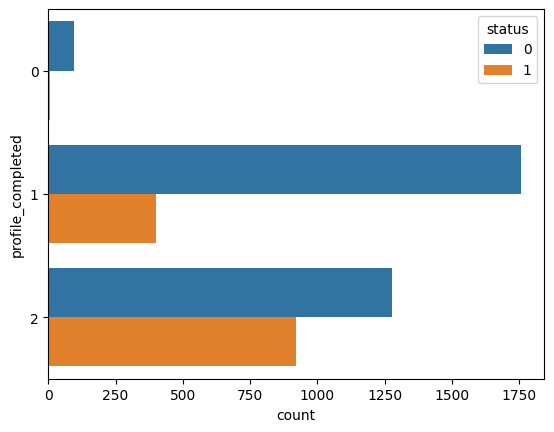

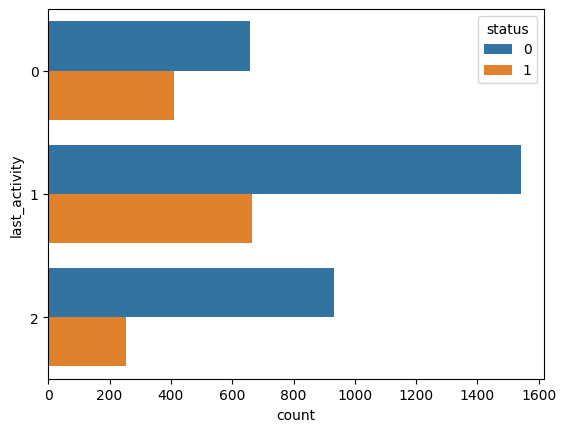

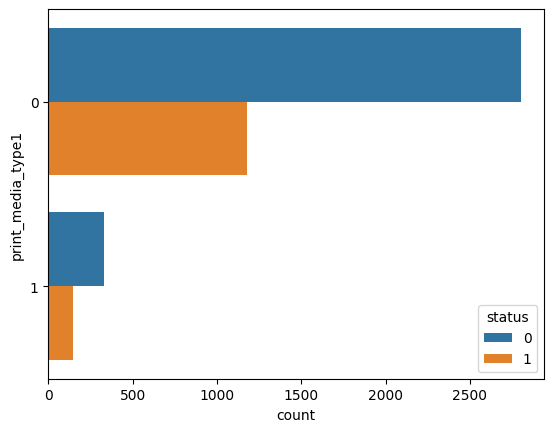

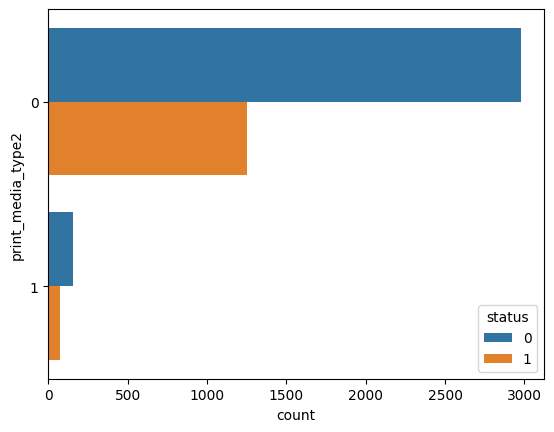

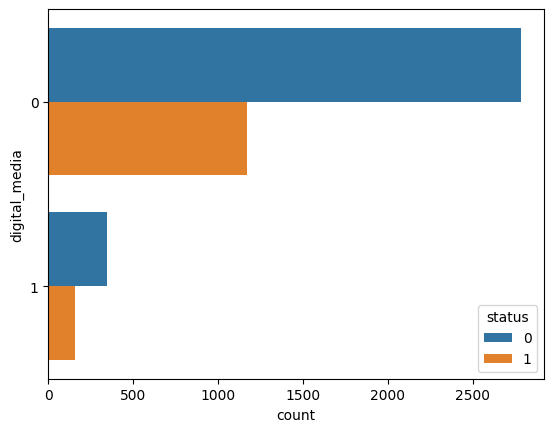

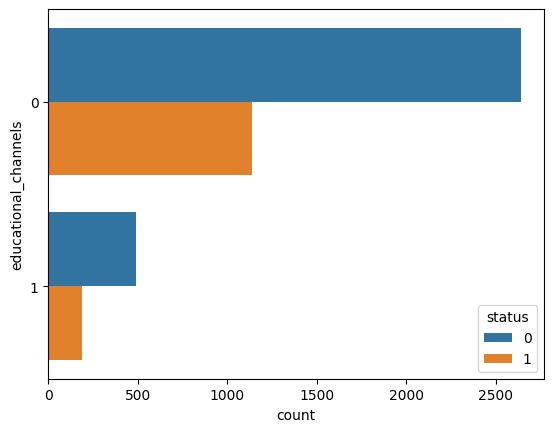

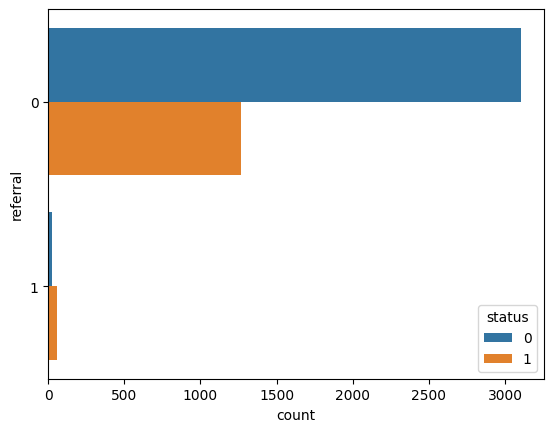

In [12]:
# I can make visualizations for the categorical variables
sns.countplot(data=df, y='current_occupation', hue='status')
plt.show()

sns.countplot(data=df, y='first_interaction', hue='status')
plt.show()

sns.countplot(data=df, y='profile_completed', hue='status')
plt.show()

sns.countplot(data=df, y='last_activity', hue='status')
plt.show()

sns.countplot(data=df, y='print_media_type1', hue='status')
plt.show()

sns.countplot(data=df, y='print_media_type2', hue='status')
plt.show()

sns.countplot(data=df, y='digital_media', hue='status')
plt.show()

sns.countplot(data=df, y='educational_channels', hue='status')
plt.show()

sns.countplot(data=df, y='referral', hue='status')
plt.show()

### For current_occupation, professional (1) has the highest number of status = 1 values. For first_interaction, website (0) has the higher number of status = 1 values. For profile_completed, high (2) has the highest number of status = 1 values. For last_activity, email activity (1) has the has the highest number of status = 1 values. For print_media_type1, no (0) has the higher number of status = 1 values. For print_media_type2, no (0) has the higher number of status = 1 values. For digital_media, no (0) has the higher number of status = 1 values. For educational_channels, no (0) has the higher number of status = 1 values. For referral, no (0) has the higher number of status = 1 values.

### These results indicate that professional leads are more likely to convert to paid customers, while students are the least likely. The leads whose first interaction was with the website are more likely for conversion than those whose first interaction was with the mobile app, so the first channels of interaction clearly has an impact on the lead status. Most of the leads did not hear about ExtraaLearn from newspaper, magazine, digital platforms, educational channels, or referrals. Comparison of the graphs suggests that educational channels had more leads converted to paid customers than the other interaction modes. This interaction mode seems to work the best and appears to have the highest lead conversion rate. The graph for profile_completed also shows that those who had a high percentage of their profile completed are more likely to convert to paid customers than those who had completed a medium or low percentage of their profile, thus having more details about a lead seems to increase the chances of conversion.

<Axes: >

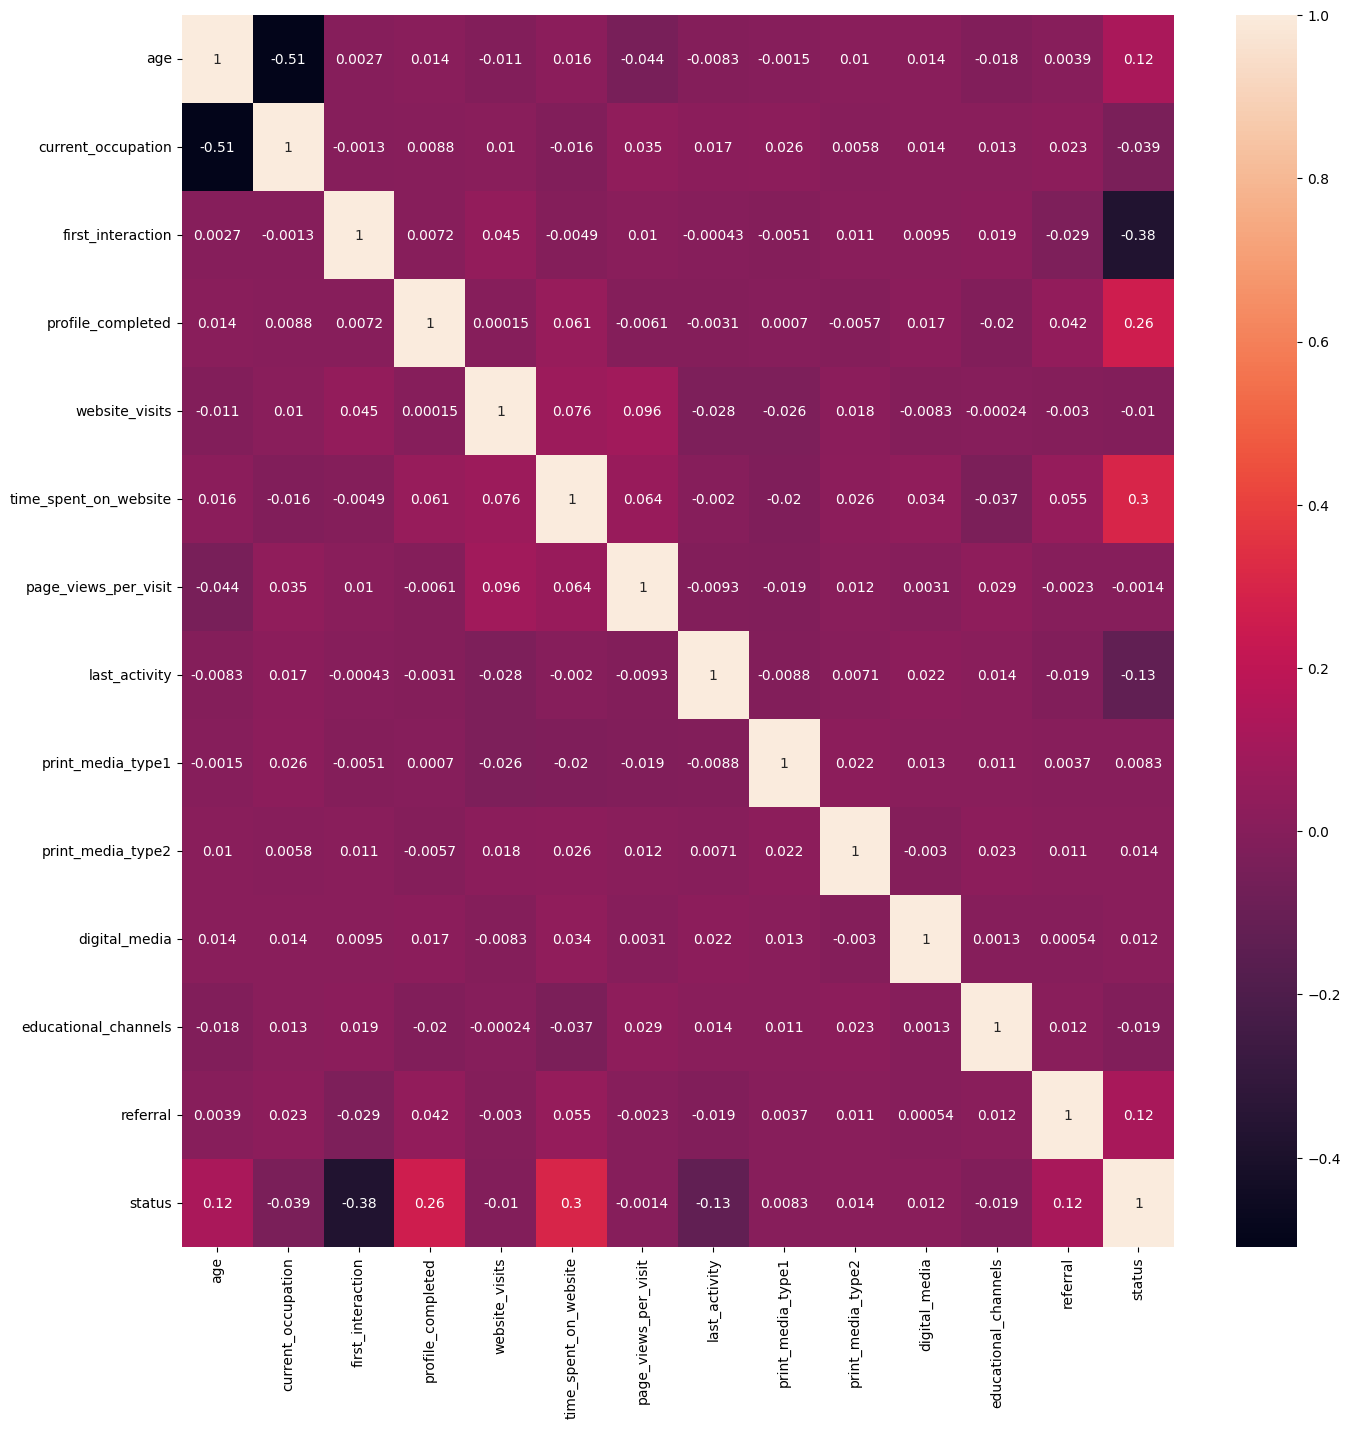

In [13]:
# I can also use a correlation matrix to visualization the correlations between the variables
corr = df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr, annot=True)

### The correlation matrix indicates that profile_completed and time_spent_on_website have the strongest positive correlations with status while first_interaction has the strongest negative correlation with status.

## Building a Decision Tree model

In [14]:
# I import the libaries and packages that are useful for decision tree models
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [15]:
# I seperate the feature matrix and the target vector
X = df.drop(columns='status')
Y = df['status']

In [16]:
# I split the data into train and test sets
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size = 0.25, random_state = 2)

In [17]:
# I fit the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

## Do we need to prune the tree?

In [18]:
# I make predictions with this model
Y_pred = model.predict(X_test)

In [19]:
# I determine accuracy of this model
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       793
           1       0.66      0.72      0.69       322

    accuracy                           0.81      1115
   macro avg       0.77      0.79      0.78      1115
weighted avg       0.82      0.81      0.82      1115



In [20]:
# I can also use a confusion matrix to evaluate the model performance
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[676 117]
 [ 90 232]]


### These results indicate that the model has overall good performance with the test data. This suggests that this model is not overfitted, so I do not need to prune the tree.

## Building a Random Forest model

In [21]:
# I import the necessary library for this model
from sklearn.ensemble import RandomForestClassifier

In [22]:
# I fit the random forest model
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

## Do we need to prune the tree?

In [23]:
# I make predictions with this model
Y_pred = model.predict(X_test)

In [24]:
# I determine accuracy of this model
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       793
           1       0.76      0.73      0.75       322

    accuracy                           0.86      1115
   macro avg       0.83      0.82      0.82      1115
weighted avg       0.86      0.86      0.86      1115



In [25]:
# I can also use a confusion matrix to evaluate the model performance
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[719  74]
 [ 86 236]]


### These results indicate that the model has very good performance overall with the test data. This suggests that this model is not overfitted, so I do not need to prune the tree. This model appears to have better performance than the previous model based on the results.

## Actionable Insights and Recommendations

### The main conclusion that can be made from this analysis is that the ExtraaLearn website is crucial for influencing a lead to convert to a paid customer. Those who first interacted via the website and completed a large amount of their profile on the website have a higher tendency to convert than those who did not. The time spent by a lead on the website also matters. The analysis also suggests that professionals are more likely to convert to paid customers than students or unemployed, and those whose last activity was in email are more likely for conversion. The interaction channels of print media, digital media, educational channels, and referrals are not particulary effective but educational channels is the best of these options. In addition to these conclusions, the random forest model is better than the decision tree model for classification of the status variable and it does not need pruning.

### Based on these insights, I recommend that the company should focus on the website to attract more leads, with an emphasis on professionals. The website should strongly encourage leads to complete their profiles so that more useful information can be obtained. The website should have abundant resources with a good visual format so that the leads spend more time reading about the educational services offered by ExtraaLearn which can motivate them to convert to paid customers. Leads should be asked to provide their email in a 'Register' tab so that ExtraaLearn can contact them further via email. Clickable online ads for ExtraaLearn should be placed in educational channels that send users directly to the website. I present these recommendations for ExtraaLearn to better identify leads who are more likely to convert and allocate resources accordingly.